<a href="https://colab.research.google.com/github/NataliaOlarte/Ciencia_de_datos/blob/main/Ciencia_de_datos_Actividad_en_clase_Medidas_Centrales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install statsmodels

In [4]:
!pip install wquantiles

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sinderpreet/customer-segmentation-and-clustering-python")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 465kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sinderpreet/customer-segmentation-and-clustering-python/versions/1


In [7]:
import os
files = os.listdir(path)
print(files)

['Mall_Customers.csv']


In [8]:
a_path=os.path.join(path,"Mall_Customers.csv")
df=pd.read_csv(a_path)

In [9]:
#Ver los últimos 4 registros
df.tail(4)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [10]:
#Ver un muestreo de los 10 registros
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
188,189,Female,41,103,17
136,137,Female,44,73,7
184,185,Female,41,99,39
0,1,Male,19,15,39
15,16,Male,22,20,79
185,186,Male,30,99,97
133,134,Female,31,72,71
167,168,Female,33,86,95
16,17,Female,35,21,35
85,86,Male,48,54,46


In [11]:
df.columns
list(df.columns)#
df.info() #Ver si hay datos vacios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
df.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,1.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,1.000000,18.000000,15.000000,1.000000
25%,50.750000,1.000000,28.750000,41.500000,34.750000
50%,100.500000,1.000000,36.000000,61.500000,50.000000
75%,150.250000,2.000000,49.000000,78.000000,73.000000
max,200.000000,2.000000,70.000000,137.000000,99.000000


In [13]:
df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 2})

# Mostrar las primeras filas para verificar el cambio
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1       2   19                  15                      39
1           2       2   21                  15                      81
2           3       1   20                  16                       6
3           4       1   23                  16                      77
4           5       1   31                  17                      40


In [14]:
df["Annual Income (k$)"].mean()
#Calcular el promedio
#los datos atípiicos afectan el promedio por eso no se suele preferir

60.56

In [15]:
trim_mean(df["Annual Income (k$)"], 0.1)
#cortar el 10% de los datos arriba y abajo
#sirve para ver si hay datos atípicos

59.6375

Podría decirse que no hay muchos datos atípicos ya que no varía mucho

In [16]:
#Media ponderada de Compras
np.average(df["Spending Score (1-100)"], weights=df["Annual Income (k$)"])
#Promedio ponderado es el mejor promedio

50.31035336856011

este valor sugiere un gasto moderado entre los clientes con mayores ingresos, lo cual puede ser una oportunidad de mejora en el mercado, ya que se debe impulsar a esas personas con mayores ingresos a gastar más en el centro comercial. Hay un gasto promedio normal.

<Axes: >

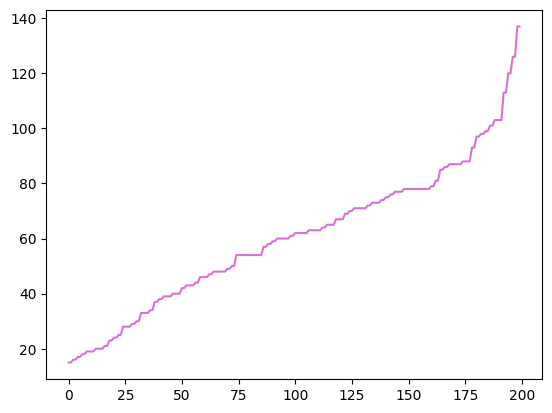

In [17]:
#Graficar
df["Annual Income (k$)"].plot.line(color="orchid")


Se observa como hay más personas con mayores ingresos, por lo que es un público al cual llegar

<Axes: >

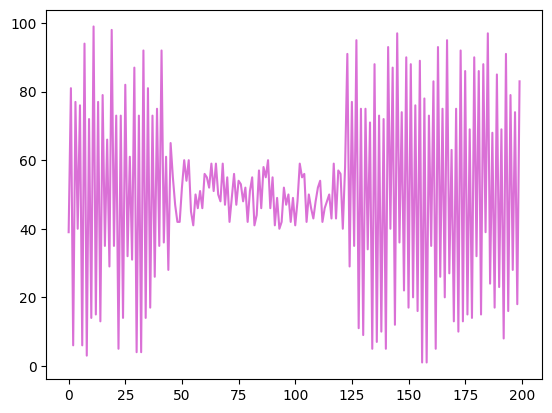

In [18]:
#Graficar
df["Spending Score (1-100)"].plot.line(color="orchid")

Se puede observar como hay una mayor cantidad de personas que tienen grandes gastos, aunque hay algunos que no gastan tanto

<Axes: >

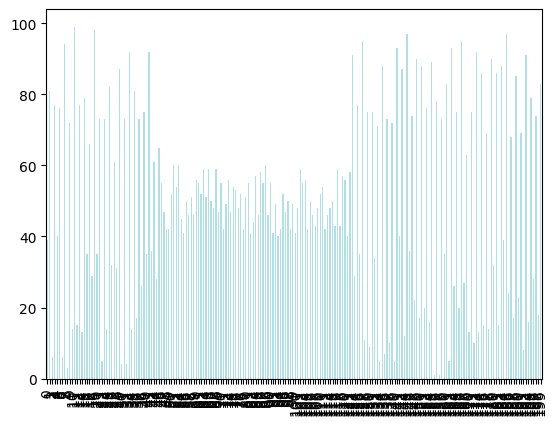

In [19]:
df["Spending Score (1-100)"].plot.bar(color="powderblue")

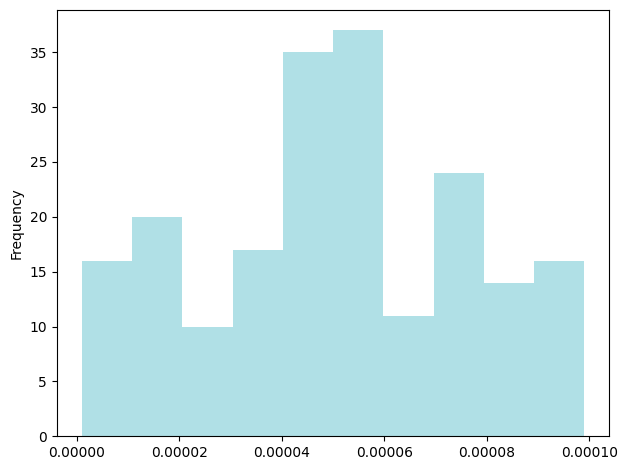

In [24]:
ax=(df["Spending Score (1-100)"]/1_000_000).plot.hist(color="powderblue")
ax.set_label("Spending Score (1-100) [millones]")
plt.tight_layout() #Para q sea delgadito
plt.show()

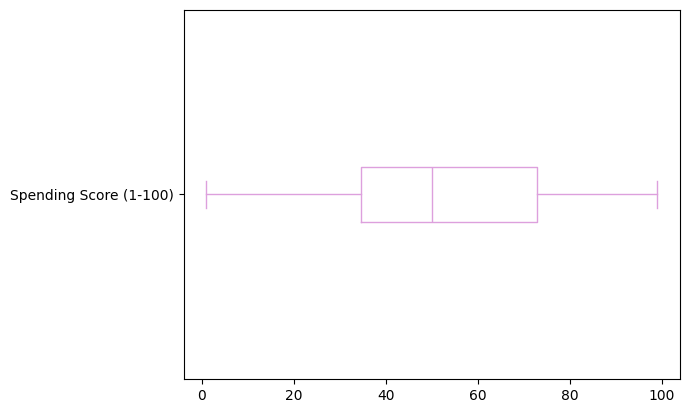

In [30]:
import matplotlib.pyplot as plt
df["Spending Score (1-100)"].plot.box(color="plum", vert=False)
plt.show()

Gracias a las anteriores gráficas, se observa con claridad que es mayor el número de consumidores que compran en pocas cantidades. El Spending Score tiene una distribución bastante equilibrada, con la mayoría de los clientes gastando entre 35 y 70, pero con algunos gastando muy poco y otros mucho. Esto sugiere la posible existencia de segmentos de clientes con distintos patrones de gasto. Además cabe resaltar que no se evidencian valores atípicos.

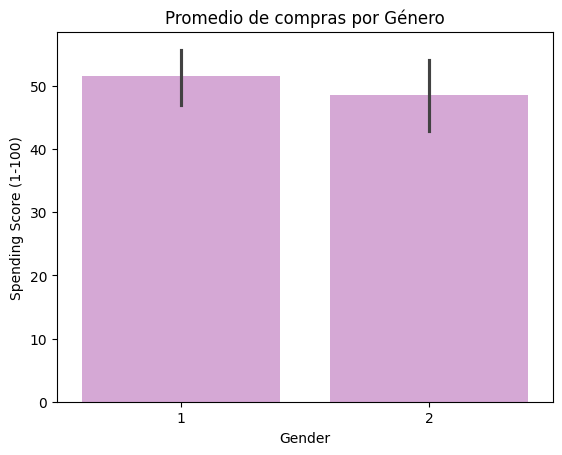

In [34]:
sns.barplot(x="Gender", y="Spending Score (1-100)", data=df, estimator=np.mean, color="plum")
plt.title("Promedio de compras por Género")
plt.show()


Se puede observar en esta gráfica como, aunque las mujeres gastan o compran más, la diferencia entre ambos géneros no es muy significativa. Sin embargo, se nota que el gasto varía mucho dentro de los hombres, por la barra de error de gran tamaño, lo que puede estar indicando subgrupos con comportamientos diferentes, es decir, que algunos compran demasiado y otros muy poco, lo que afecta la exactitud de los datos.
Con base en lo anterior, sería una mejor opción no tomar en cuenta el género como una característica decisiva en el análisis.

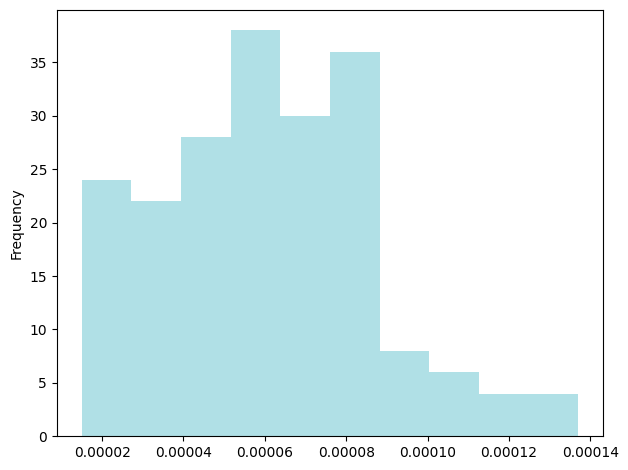

In [39]:
ax=(df["Annual Income (k$)"]/1_000_000).plot.hist(color="powderblue")
ax.set_label("Población [millones]")
plt.tight_layout() #Para q sea delgadito
plt.show()

Se observa que hay una media mayor que la mediana en este caso. Esto deja ver que, la mayoría de los compradores del mall tiene ingresos bajos o moderados, pero hay algunos con ingresos muy altos que están influyendo en la media.